In [6]:
import scipy.stats as stats
from scipy.stats import norm, expon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
DataWhr2024 = pd.read_csv("DataWhr2024.csv")
UnM49 = pd.read_csv("UnM49.csv", sep=';')

UnM49 = UnM49[['Country or Area', 'Sub-region Name', 'Region Name']]
UnM49 = UnM49.rename({'Country or Area':'Country name', 'Sub-region Name':'Subregion', 'Region Name':'Continent'}, axis=1)

DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Hong"), "Country name"] = "Hong Kong"
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Somaliland"), "Country name"] = "Somaliland"
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Taiwan"), "Country name"] = "Taiwan"

UnM49.loc[97, "Country name"] = "Bolivia"
UnM49.loc[33, "Country name"] = "Congo (Brazzaville)"
UnM49.loc[34, "Country name"] = "Congo (Kinshasa)"
UnM49.loc[124, "Country name"] = "Hong Kong"
UnM49.loc[125, "Country name"] = "Macao"
UnM49.loc[126, "Country name"] = "North Korea"
UnM49.loc[145, "Country name"] = "Iran"
UnM49.loc[46, "Country name"] = "Ivory Coast"
UnM49.loc[133, "Country name"] = "Laos"
UnM49.loc[129, "Country name"] = "South Korea"
UnM49.loc[173, "Country name"] = "Moldova"
UnM49.loc[217, "Country name"] = "Netherlands"
UnM49.loc[175, "Country name"] = "Russia"
UnM49.loc[164, "Country name"] = "Syria"
UnM49.loc[26, "Country name"] = "Tanzania"
UnM49.loc[116, "Country name"] = "United States"
UnM49.loc[193, "Country name"] = "United Kingdom"
UnM49.loc[111, "Country name"] = "Venezuela"
UnM49.loc[140, "Country name"] = "Vietnam"

_ = pd.DataFrame(
    {
        "Country name": ["Kosovo", "Somaliland", "Taiwan"],
        "Subregion": ["Southern Europe", "Sub-Saharan Africa", "Eastern Asia"],
        "Continent": ["Europe", "Africa", "Asia"],
    }
)

UnM49 = pd.concat([UnM49, _], axis=0)
UnM49 = UnM49.reset_index(drop=True)

# Data
Dat = pd.merge(DataWhr2024, UnM49)

# Data of 2023
Dat2023 = Dat[Dat['year'] == 2023]
Dat2023 = Dat2023.reset_index(drop=True)

**Question 1**

In [8]:
# Define parameters for the normal distribution
# Assuming p (breast cancer rate) is known; set an example p = 0.0005 (0.05%)
p = 38/100000
n = 100000
mu = n * p  # Mean
sigma = (n * p * (1 - p))**0.5  # Standard deviation

# Define the normal distribution
normal_dist = norm(loc=mu, scale=sigma)

# (a) P(20 < X ≤ 40)
prob_a = normal_dist.cdf(40) - normal_dist.cdf(20)

# (b) P(X > 60)
prob_b = 1 - normal_dist.cdf(60)

# (c) P(X ≤ 30)
prob_c = normal_dist.cdf(30)

# (d) P(X = 35)
# For continuous distributions, the probability at an exact point is 0, 
# so use the probability density function (PDF) to approximate it.
prob_d = normal_dist.pdf(35)

# Print results with 6 decimal places
print(f"(a) P(20 < X ≤ 40): {prob_a:.6f}")
print(f"(b) P(X > 60): {prob_b:.6f}")
print(f"(c) P(X ≤ 30): {prob_c:.6f}")
print(f"(d) P(X = 35): {prob_d:.6f}")


(a) P(20 < X ≤ 40): 0.625475
(b) P(X > 60): 0.000179
(c) P(X ≤ 30): 0.097141
(d) P(X = 35): 0.057498


**Question 2**

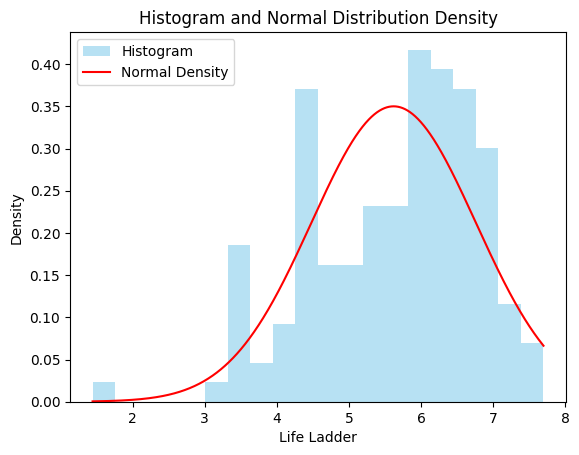

(a) Probability Life Ladder > 5 (Normal): 0.707072
(a) Probability Life Ladder > 5 (Empirical): 0.702899
(b) Probability 4 ≤ Life Ladder ≤ 7 (Normal): 0.809476
(b) Probability 4 ≤ Life Ladder ≤ 7 (Empirical): 0.833333


In [9]:
Dat1 = Dat2023['Life Ladder']

meanLL = Dat1.mean()
stdLL = Dat1.std()

normal_dist = norm(loc=meanLL, scale=stdLL)

# Calculate mean and standard deviation of Life Ladder
meanLL = Dat1.mean()
stdLL = Dat1.std()

# Define the normal distribution with calculated parameters
normal_dist = norm(loc=meanLL, scale=stdLL)

# (a) Probability that Life Ladder > 5
prob_normal_a = 1 - normal_dist.cdf(5)  # Using the normal distribution
prob_empirical_a = (Dat1 > 5).mean()  # Empirical probability from dataset

# (b) Probability that Life Ladder is between 4 and 7
prob_normal_b = normal_dist.cdf(7) - normal_dist.cdf(4)  # Using the normal distribution
prob_empirical_b = ((Dat1 >= 4) & (Dat1 <= 7)).mean()  # Empirical probability from dataset

# (c) Histogram and density plot
plt.hist(Dat1, bins=20, density=True, alpha=0.6, color='skyblue', label='Histogram')
x_values = np.linspace(min(Dat1), max(Dat1), 1000)
plt.plot(x_values, normal_dist.pdf(x_values), color='red', label='Normal Density')
plt.xlabel('Life Ladder')
plt.ylabel('Density')
plt.title('Histogram and Normal Distribution Density')
plt.legend()
plt.show()

# Print results
print(f"(a) Probability Life Ladder > 5 (Normal): {prob_normal_a:.6f}")
print(f"(a) Probability Life Ladder > 5 (Empirical): {prob_empirical_a:.6f}")
print(f"(b) Probability 4 ≤ Life Ladder ≤ 7 (Normal): {prob_normal_b:.6f}")
print(f"(b) Probability 4 ≤ Life Ladder ≤ 7 (Empirical): {prob_empirical_b:.6f}")


**Question 3**

In [10]:
# Load the dataset (replace 'PrognosisWomenBreastCancer.csv' with the actual file path)
DatBreastCancer = pd.read_csv("PrognosisWomenBreastCancer.csv")

# Check the structure of the dataset to find relevant columns
# Assuming 'time_of_death' is the column representing time of death in months and 'stain' is the group column
#print(DatBreastCancer.head())

# Separate the data into two groups based on 'stain' (1 or 2)
group_1 = DatBreastCancer[DatBreastCancer['stain'] == 1]['time']
group_2 = DatBreastCancer[DatBreastCancer['stain'] == 2]['time']

# Calculate the mean (σ) for each group, which corresponds to the scale parameter of the exponential distribution
sigma_1 = group_1.mean()
sigma_2 = group_2.mean()

# Calculate the rate parameter λ (inverse of σ) for each group
lambda_1 = 1 / sigma_1
lambda_2 = 1 / sigma_2

# (b) Calculate the probability that each survives more than 10 years (120 months)
# P(X > 120) = e^(-120 / σ)
survival_1 = np.exp(-120 / sigma_1)
survival_2 = np.exp(-120 / sigma_2)

# (c) Calculate the probability that each dies within the next 3 years (36 months)
# P(X <= 36) = 1 - e^(-36 / σ)
death_1 = 1 - np.exp(-36 / sigma_1)
death_2 = 1 - np.exp(-36 / sigma_2)

# Print the results
print(f"Group 1 (stain=1) - σ: {sigma_1:.2f}, λ: {lambda_1:.2f}")
print(f"Group 2 (stain=2) - σ: {sigma_2:.2f}, λ: {lambda_2:.2f}")
print(f"Probability that Group 1 survives more than 10 years: {survival_1:.4f}")
print(f"Probability that Group 2 survives more than 10 years: {survival_2:.4f}")
print(f"Probability that Group 1 dies within 3 years: {death_1:.4f}")
print(f"Probability that Group 2 dies within 3 years: {death_2:.4f}")


Group 1 (stain=1) - σ: 127.08, λ: 0.01
Group 2 (stain=2) - σ: 83.72, λ: 0.01
Probability that Group 1 survives more than 10 years: 0.3889
Probability that Group 2 survives more than 10 years: 0.2385
Probability that Group 1 dies within 3 years: 0.2467
Probability that Group 2 dies within 3 years: 0.3495
